In [374]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [2]:
nba_raw = pd.read_csv('nba_stats_raw.csv')
nba_raw.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,SEASON
0,Trae Young,ATL,23,76,40,36,2651.9,2155,711,1544,...,737,303,72,7,128,3535,42,0,159,2021-22
1,DeMar DeRozan,CHI,32,76,43,33,2742.9,2118,774,1535,...,374,181,68,24,178,3244,6,0,77,2021-22
2,Joel Embiid,PHI,28,68,45,23,2296.4,2079,666,1334,...,284,214,77,99,181,3774,46,2,368,2021-22
3,Jayson Tatum,BOS,24,76,49,27,2731.0,2046,708,1564,...,334,217,75,49,174,3433,22,0,667,2021-22
4,Nikola Jokic,DEN,27,74,46,28,2475.6,2004,764,1311,...,584,281,109,63,191,4338,66,19,444,2021-22


# Cleaning and Prepping Data

In [165]:
# Check datatypes
nba_raw.dtypes

PLAYER     object
TEAM       object
AGE         int64
GP          int64
W           int64
L           int64
MIN       float64
PTS         int64
FGM         int64
FGA         int64
FG%       float64
3PM         int64
3PA         int64
3P%       float64
FTM         int64
FTA         int64
FT%       float64
OREB        int64
DREB        int64
REB         int64
AST         int64
TOV         int64
STL         int64
BLK         int64
PF          int64
FP          int64
DD2         int64
TD3         int64
+/-         int64
SEASON     object
dtype: object

In [4]:
# View stats
nba_raw.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,12307.000000,12307.000000,12307.000000,12307.00000,12307.000000,12307.000000,12307.000000,12307.000000,12307.000000,12307.000000,...,12307.000000,12307.000000,12307.000000,12307.000000,12307.000000,12307.000000,12307.000000,12307.000000,12307.000000,12307.000000
mean,27.084261,51.284472,25.640042,25.64443,1203.294272,499.889900,186.385634,411.118225,43.447989,36.501909,...,211.858942,110.314293,69.350207,38.225806,24.443081,105.071667,1038.294060,4.273422,0.118875,-0.017957
std,4.335530,25.100181,15.967273,14.69967,891.763451,465.709429,170.733779,366.898757,10.083881,49.279353,...,194.687783,130.805531,62.278953,34.256465,33.164808,73.031412,883.926708,9.153311,1.006281,169.663292
min,18.000000,1.000000,0.000000,0.00000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-761.000000
25%,24.000000,31.000000,12.000000,14.00000,375.700000,114.000000,43.000000,103.000000,39.800000,0.000000,...,58.000000,19.000000,19.000000,10.000000,4.000000,40.000000,273.000000,0.000000,0.000000,-76.000000
50%,26.000000,57.000000,25.000000,25.00000,1115.400000,378.000000,143.000000,323.000000,43.700000,12.000000,...,164.000000,65.000000,54.000000,30.000000,13.000000,101.000000,861.000000,0.000000,0.000000,-12.000000
75%,30.000000,73.000000,38.000000,36.00000,1905.450000,763.500000,285.000000,627.500000,48.000000,59.000000,...,306.000000,151.000000,103.000000,57.000000,31.000000,159.000000,1593.500000,4.000000,0.000000,54.000000
max,44.000000,85.000000,73.000000,71.00000,3484.100000,2832.000000,978.000000,2173.000000,100.000000,402.000000,...,1247.000000,935.000000,464.000000,225.000000,307.000000,371.000000,4906.000000,71.000000,42.000000,1072.000000


In [5]:
# Check for null values in each column
null_counts = nba_raw.isna().sum()
null_counts

PLAYER    0
TEAM      0
AGE       0
GP        0
W         0
L         0
MIN       0
PTS       0
FGM       0
FGA       0
FG%       0
3PM       0
3PA       0
3P%       0
FTM       0
FTA       0
FT%       0
OREB      0
DREB      0
REB       0
AST       0
TOV       0
STL       0
BLK       0
PF        0
FP        0
DD2       0
TD3       0
+/-       0
SEASON    0
dtype: int64

In [167]:
# Check for duplicate rows
duplicate_rows = nba_raw[nba_raw.duplicated()]
duplicate_rows

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,SEASON


In [54]:
# Each row pertains to a player during a particular season/yr
# Rank players by the number of years played
list1 = nba_raw['PLAYER'].value_counts().reset_index()
list1.columns = ['PLAYER', 'NUM_YRS']
list1

,PLAYER,NUM_YRS
0,Vince Carter,22
1,Dirk Nowitzki,21
2,Kobe Bryant,20
3,Kevin Garnett,20
4,Jamal Crawford,20
...,...,...
2449,Kevin Murphy,1
2450,Kris Joseph,1
2451,Fab Melo,1
2452,Josh Akognon,1


In [55]:
# Merge 2 dataframes
nba = pd.merge(nba_raw, list1, on='PLAYER', how='left')

In [56]:
nba.head(10)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,SEASON,NUM_YRS
0,Trae Young,ATL,23,76,40,36,2651.9,2155,711,1544,...,303,72,7,128,3535,42,0,159,2021-22,4
1,DeMar DeRozan,CHI,32,76,43,33,2742.9,2118,774,1535,...,181,68,24,178,3244,6,0,77,2021-22,13
2,Joel Embiid,PHI,28,68,45,23,2296.4,2079,666,1334,...,214,77,99,181,3774,46,2,368,2021-22,6
3,Jayson Tatum,BOS,24,76,49,27,2731.0,2046,708,1564,...,217,75,49,174,3433,22,0,667,2021-22,5
4,Nikola Jokic,DEN,27,74,46,28,2475.6,2004,764,1311,...,281,109,63,191,4338,66,19,444,2021-22,7
5,Giannis Antetokounmpo,MIL,27,67,45,22,2204.2,2002,689,1245,...,219,72,91,212,3788,46,4,397,2021-22,9
6,Luka Doncic,DAL,23,65,44,21,2300.7,1847,641,1403,...,292,75,36,145,3452,44,10,146,2021-22,4
7,Devin Booker,PHX,25,68,56,12,2344.6,1822,662,1421,...,162,77,26,180,2873,5,0,469,2021-22,7
8,Karl-Anthony Towns,MIN,26,74,44,30,2475.5,1818,642,1214,...,226,72,83,267,3333,40,1,275,2021-22,7
9,Donovan Mitchell,UTA,25,67,41,26,2265.6,1733,617,1376,...,200,99,12,164,2741,3,0,276,2021-22,5


In [57]:
# Add a target column: > 4 yrs - "1", <= 4 yrs - "0"
def label_target(df):
    df = df.assign(TARGET_4UP=0)
    df.loc[df['NUM_YRS'] >4, 'TARGET_4UP']=1
    return df

In [58]:
# Dataframe with players and the number of years they've played, and whether or not they've played for more than 4 years - 'Yes' = 1, 'No' = 0
nba2 = label_target(nba)
nba2

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,STL,BLK,PF,FP,DD2,TD3,+/-,SEASON,NUM_YRS,TARGET_4UP
0,Trae Young,ATL,23,76,40,36,2651.9,2155,711,1544,...,72,7,128,3535,42,0,159,2021-22,4,0
1,DeMar DeRozan,CHI,32,76,43,33,2742.9,2118,774,1535,...,68,24,178,3244,6,0,77,2021-22,13,1
2,Joel Embiid,PHI,28,68,45,23,2296.4,2079,666,1334,...,77,99,181,3774,46,2,368,2021-22,6,1
3,Jayson Tatum,BOS,24,76,49,27,2731.0,2046,708,1564,...,75,49,174,3433,22,0,667,2021-22,5,1
4,Nikola Jokic,DEN,27,74,46,28,2475.6,2004,764,1311,...,109,63,191,4338,66,19,444,2021-22,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,Anthony Miller,ATL,25,1,0,1,13.7,0,0,5,...,0,0,2,8,0,0,-14,1996-97,6,1
12303,Bruce Bowen,MIA,26,1,1,0,0.6,0,0,0,...,0,1,0,3,0,0,3,1996-97,13,1
12304,Cuonzo Martin,MIL,25,3,0,3,13.0,0,0,7,...,0,0,1,2,0,0,-2,1996-97,1,0
12305,Derrick Alston,ATL,24,2,1,1,10.6,0,0,5,...,0,0,0,5,0,0,-7,1996-97,1,0


In [63]:
# See all columns
nba2.columns

Index(['PLAYER', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'SEASON',
       'NUM_YRS', 'TARGET_4UP'],
      dtype='object')

In [73]:
# Drop column features that would cause major collinearity issues
nba3 = nba2.drop(columns=['FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'FP'])
nba3.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FG%,3P%,...,TOV,STL,BLK,PF,DD2,TD3,+/-,SEASON,NUM_YRS,TARGET_4UP
0,Trae Young,ATL,23,76,40,36,2651.9,2155,46.0,38.2,...,303,72,7,128,42,0,159,2021-22,4,0
1,DeMar DeRozan,CHI,32,76,43,33,2742.9,2118,50.4,35.2,...,181,68,24,178,6,0,77,2021-22,13,1
2,Joel Embiid,PHI,28,68,45,23,2296.4,2079,49.9,37.1,...,214,77,99,181,46,2,368,2021-22,6,1
3,Jayson Tatum,BOS,24,76,49,27,2731.0,2046,45.3,35.3,...,217,75,49,174,22,0,667,2021-22,5,1
4,Nikola Jokic,DEN,27,74,46,28,2475.6,2004,58.3,33.7,...,281,109,63,191,66,19,444,2021-22,7,1


In [79]:
# Create function to locate only the rookie year (first year) stat for each player
def find_rookie_yr(df):
    rookie_yrs = df.groupby(['PLAYER'])['AGE'].min().reset_index()
    return rookie_yrs
    

In [81]:
# Dataframe of rookie year stats
rookies = find_rookie_yr(nba3)
rookies

,PLAYER,AGE
0,A.C. Green,33
1,A.J. Bramlett,23
2,A.J. Guyton,23
3,AJ Hammons,24
4,AJ Price,23
...,...,...
2449,Zion Williamson,19
2450,Zoran Dragic,26
2451,Zoran Planinic,21
2452,Zydrunas Ilgauskas,23


In [82]:
# Merge the two dataframes together. Only the rookie year for each player will be shown with their full stats for that year
rookie_yrs = nba3.merge(rookies, how='inner', indicator=False)
rookie_yrs

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FG%,3P%,...,TOV,STL,BLK,PF,DD2,TD3,+/-,SEASON,NUM_YRS,TARGET_4UP
0,Franz Wagner,ORL,20,79,21,58,2429.0,1197,46.8,35.4,...,119,68,34,164,2,0,-244,2021-22,1,0
1,Jalen Green,HOU,20,67,12,55,2137.7,1157,42.6,34.3,...,135,44,18,103,0,0,-519,2021-22,1,0
2,Scottie Barnes,TOR,20,74,43,31,2617.3,1134,49.2,30.1,...,136,80,55,192,13,0,66,2021-22,1,0
3,Cade Cunningham,DET,20,64,20,44,2088.1,1114,41.6,31.4,...,234,78,43,200,10,2,-275,2021-22,1,0
4,Evan Mobley,CLE,21,69,40,29,2331.0,1034,50.8,25.0,...,133,56,115,147,21,0,95,2021-22,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,Anthony Miller,ATL,25,1,0,1,13.7,0,0.0,0.0,...,0,0,0,2,0,0,-14,1996-97,6,1
2454,Bruce Bowen,MIA,26,1,1,0,0.6,0,0.0,0.0,...,0,0,1,0,0,0,3,1996-97,13,1
2455,Cuonzo Martin,MIL,25,3,0,3,13.0,0,0.0,0.0,...,1,0,0,1,0,0,-2,1996-97,1,0
2456,Derrick Alston,ATL,24,2,1,1,10.6,0,0.0,0.0,...,0,0,0,0,0,0,-7,1996-97,1,0


# Save File

In [166]:
# csv file
rookie_yrs.to_csv('rookie_yrs.csv', encoding='utf-8', index=False)

In [225]:
# pickle file
rookie_yrs.to_pickle("rookie_yrs_pkl")

# Continue with EDA 

In [92]:
# Look at the class distribution
rookie_yrs['TARGET_4UP'].value_counts()

0    1442
1    1016
Name: TARGET_4UP, dtype: int64

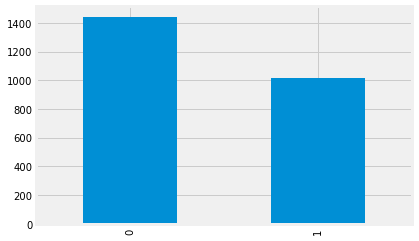

In [93]:
# Look at class distribution using a bar chart
target_pcts = rookie_yrs.TARGET_4UP.value_counts().plot(kind='bar')

In [316]:
# Percentage of target = 1

# Total # of 1's ('Yes')
ones = rookie_yrs['TARGET_4UP'].sum() 
# Total # of 0's and 1's 
total = rookie_yrs['TARGET_4UP'].count()

percent_target = np.round((ones/total)*100, 2)
percent_target

41.33

Classes are not too badly disproportionate; that is, they're not too imbalanced.

In [98]:
# Check the stats
rookie_yrs.describe()

,AGE,GP,W,L,MIN,PTS,FG%,3P%,FT%,OREB,...,AST,TOV,STL,BLK,PF,DD2,TD3,+/-,NUM_YRS,TARGET_4UP
count,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,...,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000
mean,23.832384,39.858421,18.119203,21.739219,760.147803,287.041090,40.978763,21.577868,63.647681,38.056957,...,64.197315,45.816517,24.929211,15.496338,73.330350,1.956062,0.048007,-39.515867,5.023596,0.413344
std,3.381757,26.937549,14.703833,16.909463,803.202747,355.524202,12.927849,18.169102,25.524655,51.314246,...,101.531875,55.658175,30.837369,25.850250,72.472986,5.898520,0.470685,134.103459,4.221321,0.492534
min,18.000000,1.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-672.000000,1.000000,0.000000
25%,22.000000,15.000000,6.000000,7.000000,111.100000,34.000000,36.500000,0.000000,57.100000,4.000000,...,5.000000,6.000000,3.000000,1.000000,11.000000,0.000000,0.000000,-74.750000,2.000000,0.000000
50%,23.000000,38.000000,15.000000,18.000000,436.200000,140.500000,41.900000,25.900000,70.250000,18.000000,...,24.000000,23.000000,13.000000,6.000000,47.500000,0.000000,0.000000,-18.000000,3.000000,0.000000
75%,25.000000,65.000000,27.750000,34.000000,1235.825000,425.000000,46.900000,34.600000,79.100000,50.000000,...,78.000000,66.000000,37.000000,18.000000,121.000000,1.000000,0.000000,6.000000,8.000000,1.000000
max,43.000000,83.000000,69.000000,71.000000,3349.800000,2431.000000,100.000000,100.000000,100.000000,348.000000,...,935.000000,337.000000,212.000000,264.000000,332.000000,63.000000,13.000000,820.000000,22.000000,1.000000


In [168]:
rookie_yrs['TEAM'].value_counts()

PHI    99
HOU    94
ATL    90
CLE    90
BOS    89
ORL    88
DEN    88
CHI    88
GSW    87
TOR    85
DET    83
WAS    83
UTA    83
MEM    82
SAC    81
POR    81
DAL    80
PHX    80
MIA    80
LAC    80
LAL    73
MIN    71
NYK    70
SAS    69
MIL    69
IND    67
CHA    53
OKC    49
NJN    48
SEA    46
BKN    30
CHH    28
VAN    24
NOP    23
NOH    21
NOK     6
Name: TEAM, dtype: int64

In [118]:
rookie_yrs['AGE'].value_counts()

23    518
24    369
22    344
21    254
20    220
25    163
26    108
27    107
19     70
29     61
28     60
30     40
31     38
33     25
32     24
34     20
36     10
35      9
38      6
37      4
18      3
40      2
39      2
43      1
Name: AGE, dtype: int64

Let's explore some of the players who were appeared much older during their rookie year 

In [121]:
age_40 = rookie_yrs[rookie_yrs['AGE']==40]
age_40

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FG%,3P%,...,TOV,STL,BLK,PF,DD2,TD3,+/-,SEASON,NUM_YRS,TARGET_4UP
2338,John Long,TOR,40,32,12,20,369.7,129,39.3,35.3,...,24,9,2,28,0,0,-63,1996-97,1,0
2444,Charles Jones,HOU,40,12,7,5,92.2,4,40.0,0.0,...,0,2,4,8,0,0,1,1996-97,2,0


In [119]:
age_43 = rookie_yrs[rookie_yrs['AGE']==43]
age_43

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FG%,3P%,...,TOV,STL,BLK,PF,DD2,TD3,+/-,SEASON,NUM_YRS,TARGET_4UP
2324,Robert Parish,CHI,43,43,36,7,406.4,161,49.0,0.0,...,28,6,19,40,0,0,105,1996-97,1,0


In [120]:
age_39 = rookie_yrs[rookie_yrs['AGE']==39]
age_39

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FG%,3P%,...,TOV,STL,BLK,PF,DD2,TD3,+/-,SEASON,NUM_YRS,TARGET_4UP
2400,Herb Williams,NYK,39,21,10,11,183.7,39,39.1,0.0,...,5,4,5,18,0,0,-37,1996-97,3,0
2439,Earl Cureton,TOR,39,9,1,8,45.1,7,37.5,0.0,...,1,0,0,10,0,0,-6,1996-97,1,0


It appears that most players during the 1996-97 season were not, in fact, rookies.  The NBA official website records only dated back to 1996-97, but these players could've played for years before that.  

This could cause issue in the performance of our models later on.

In [94]:
# Look at the correlation map
rookie_yrs.corr()

,AGE,GP,W,L,MIN,PTS,FG%,3P%,FT%,OREB,...,AST,TOV,STL,BLK,PF,DD2,TD3,+/-,NUM_YRS,TARGET_4UP
AGE,1.000000,0.002724,0.110286,-0.091562,0.058918,0.041160,-0.007846,-0.014389,0.010370,0.051489,...,0.064074,0.023361,0.065055,-0.024343,0.043391,0.069126,0.005569,0.234348,-0.224784,-0.138719
GP,0.002724,1.000000,0.827984,0.873062,0.871386,0.774861,0.296484,0.244360,0.419039,0.669827,...,0.614631,0.771530,0.756784,0.543156,0.882702,0.385522,0.128327,-0.173473,0.504488,0.499249
W,0.110286,0.827984,1.000000,0.449454,0.682135,0.607796,0.263753,0.209959,0.344659,0.520082,...,0.490771,0.582985,0.610102,0.418968,0.699790,0.316385,0.117611,0.257227,0.434996,0.450710
L,-0.091562,0.873062,0.449454,1.000000,0.794999,0.705873,0.242962,0.206704,0.367847,0.614821,...,0.552380,0.722140,0.675069,0.500953,0.797674,0.339038,0.102160,-0.500026,0.425417,0.403407
MIN,0.058918,0.871386,0.682135,0.794999,1.000000,0.950828,0.243407,0.236953,0.336618,0.742819,...,0.777644,0.922665,0.893433,0.595520,0.911938,0.591714,0.231240,-0.163265,0.493013,0.477717
PTS,0.041160,0.774861,0.607796,0.705873,0.950828,1.000000,0.231542,0.239148,0.318233,0.693999,...,0.767544,0.930246,0.849054,0.556977,0.832122,0.639109,0.270850,-0.129623,0.456779,0.431186
FG%,-0.007846,0.296484,0.263753,0.242962,0.243407,0.231542,1.000000,0.090901,0.220546,0.307195,...,0.112977,0.198960,0.187099,0.264317,0.291789,0.175471,0.040326,0.007823,0.188740,0.179478
3P%,-0.014389,0.244360,0.209959,0.206704,0.236953,0.239148,0.090901,1.000000,0.279189,-0.048267,...,0.265457,0.212923,0.248006,-0.058510,0.136571,-0.012801,0.030945,-0.033757,0.067932,0.068666
FT%,0.010370,0.419039,0.344659,0.367847,0.336618,0.318233,0.220546,0.279189,1.000000,0.174964,...,0.269950,0.302031,0.295784,0.124785,0.310296,0.098548,0.031342,-0.072444,0.211313,0.199579
OREB,0.051489,0.669827,0.520082,0.614821,0.742819,0.693999,0.307195,-0.048267,0.174964,1.000000,...,0.354308,0.657534,0.577399,0.780112,0.820292,0.728089,0.157713,-0.107553,0.454905,0.422462


<AxesSubplot:>

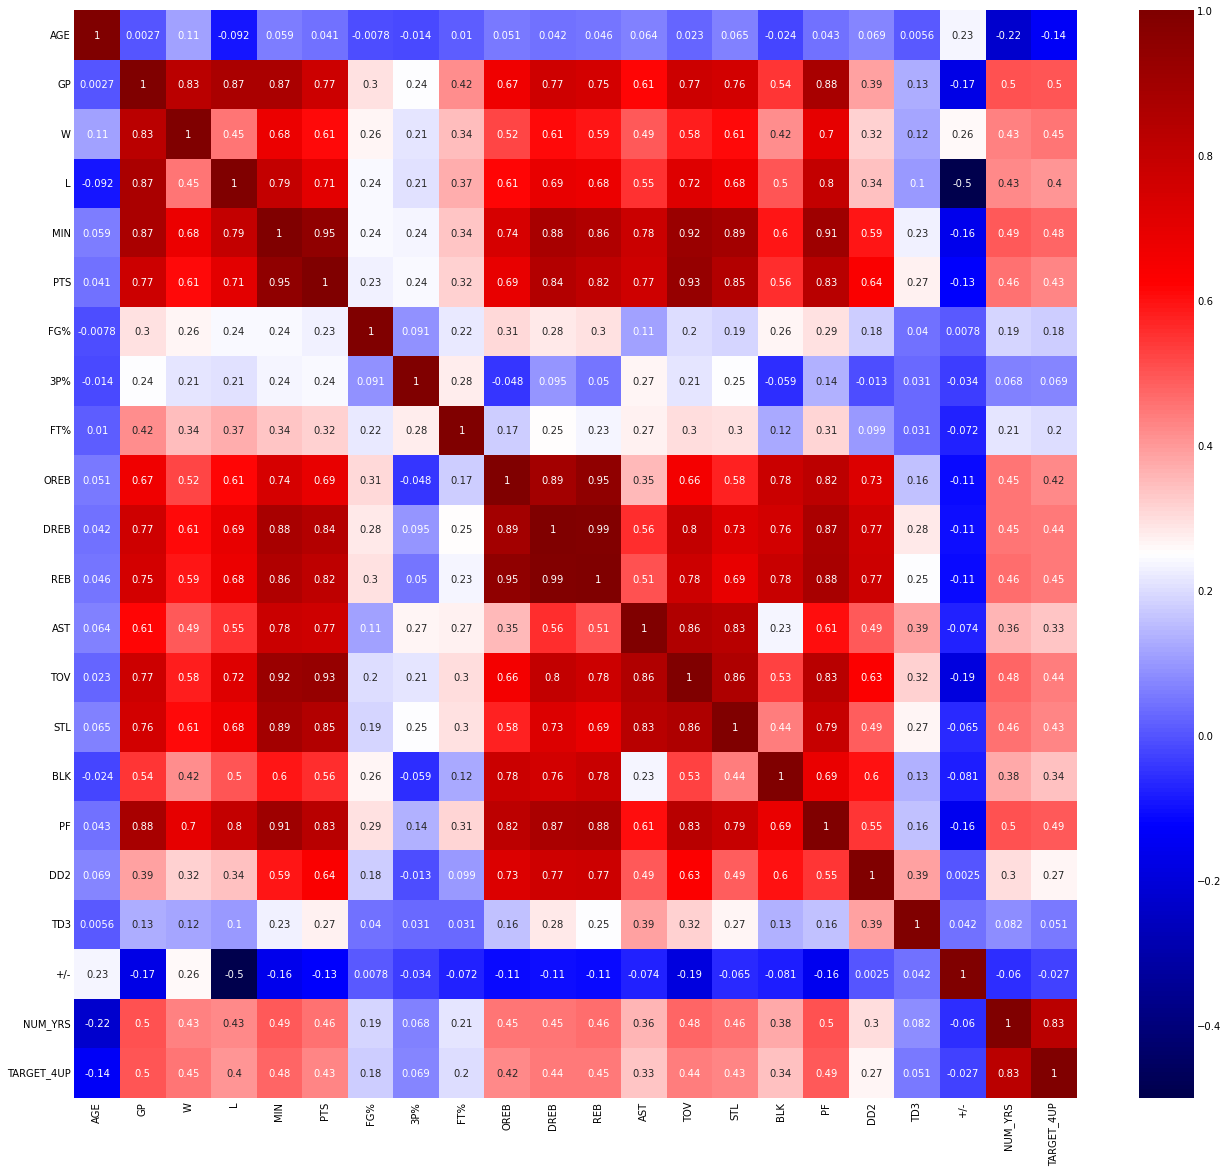

In [318]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(rookie_yrs.corr(), cmap='seismic', annot=True)

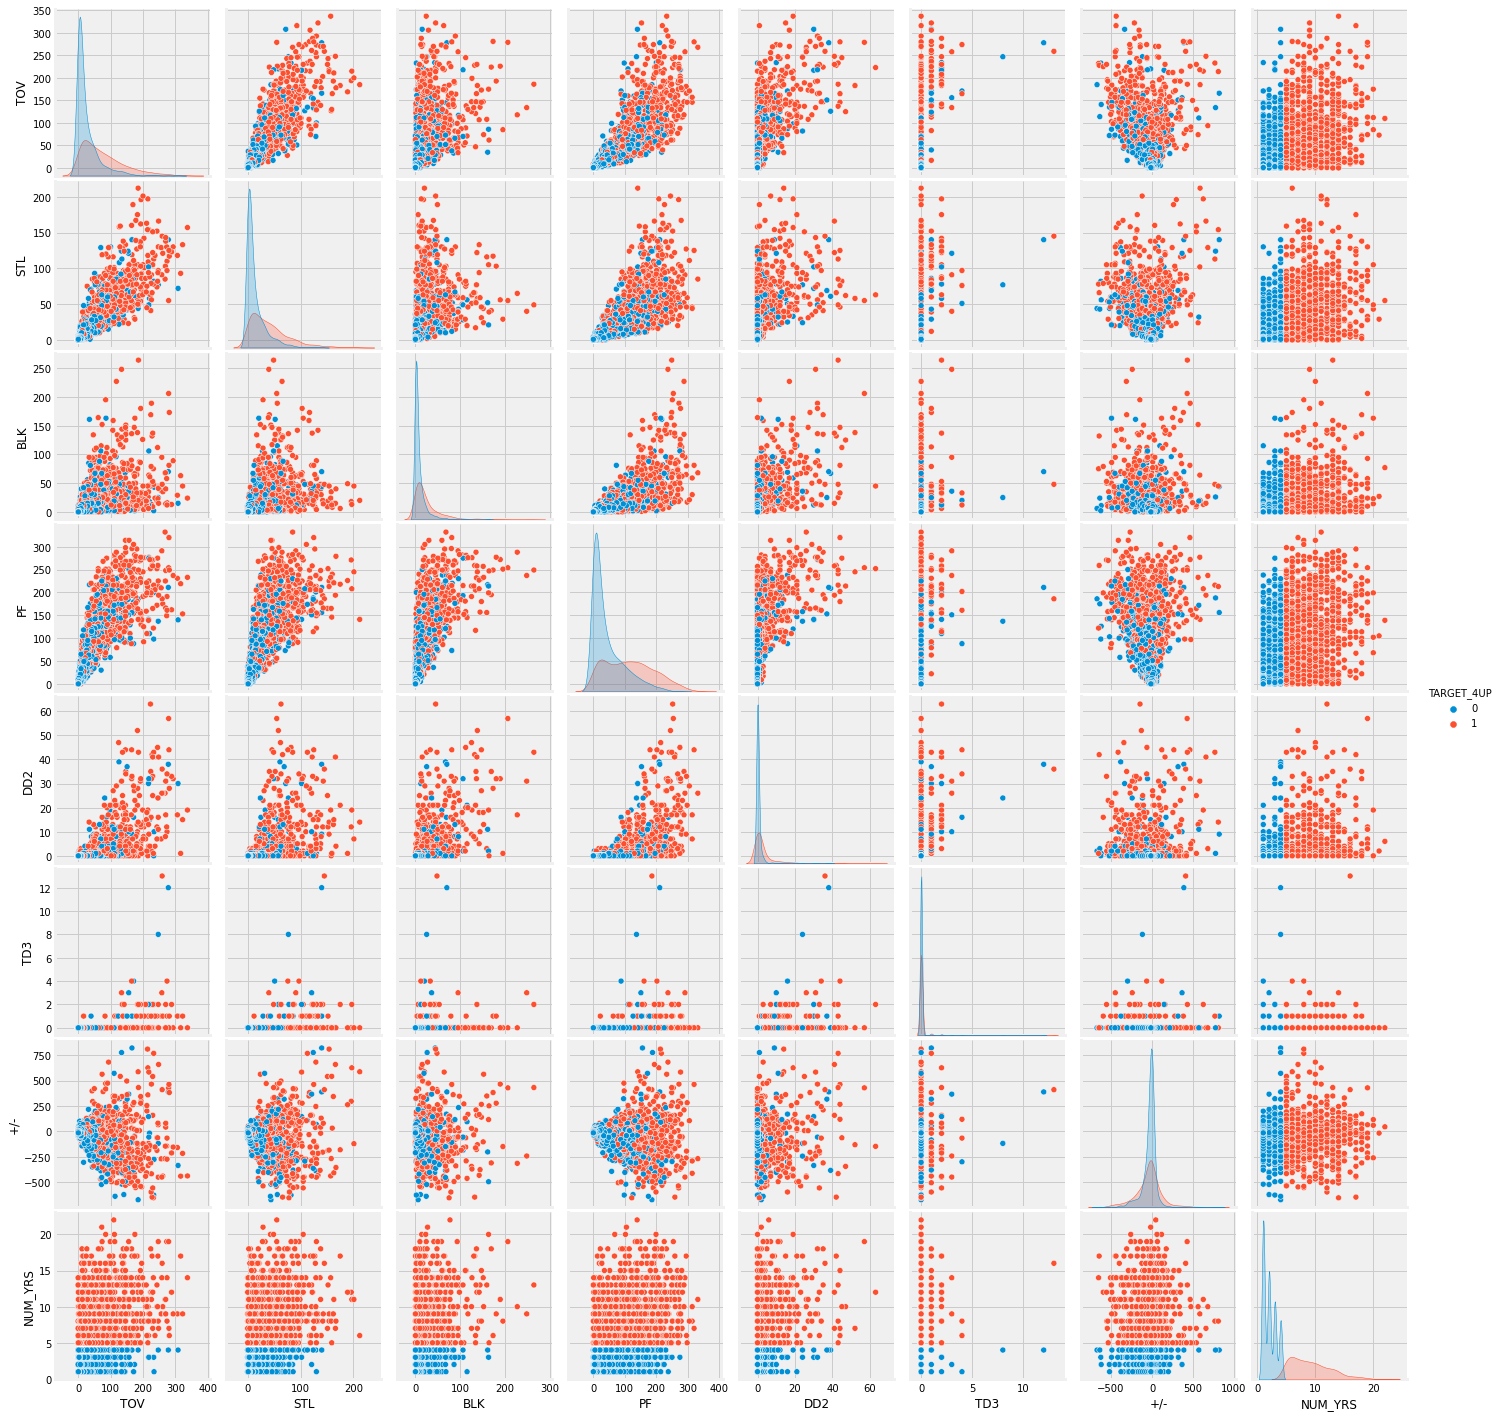

In [95]:
# Visualize target vs (some) feature plot with seaborn pairplot
sns.pairplot(rookie_yrs.iloc[:,15:], hue='TARGET_4UP');

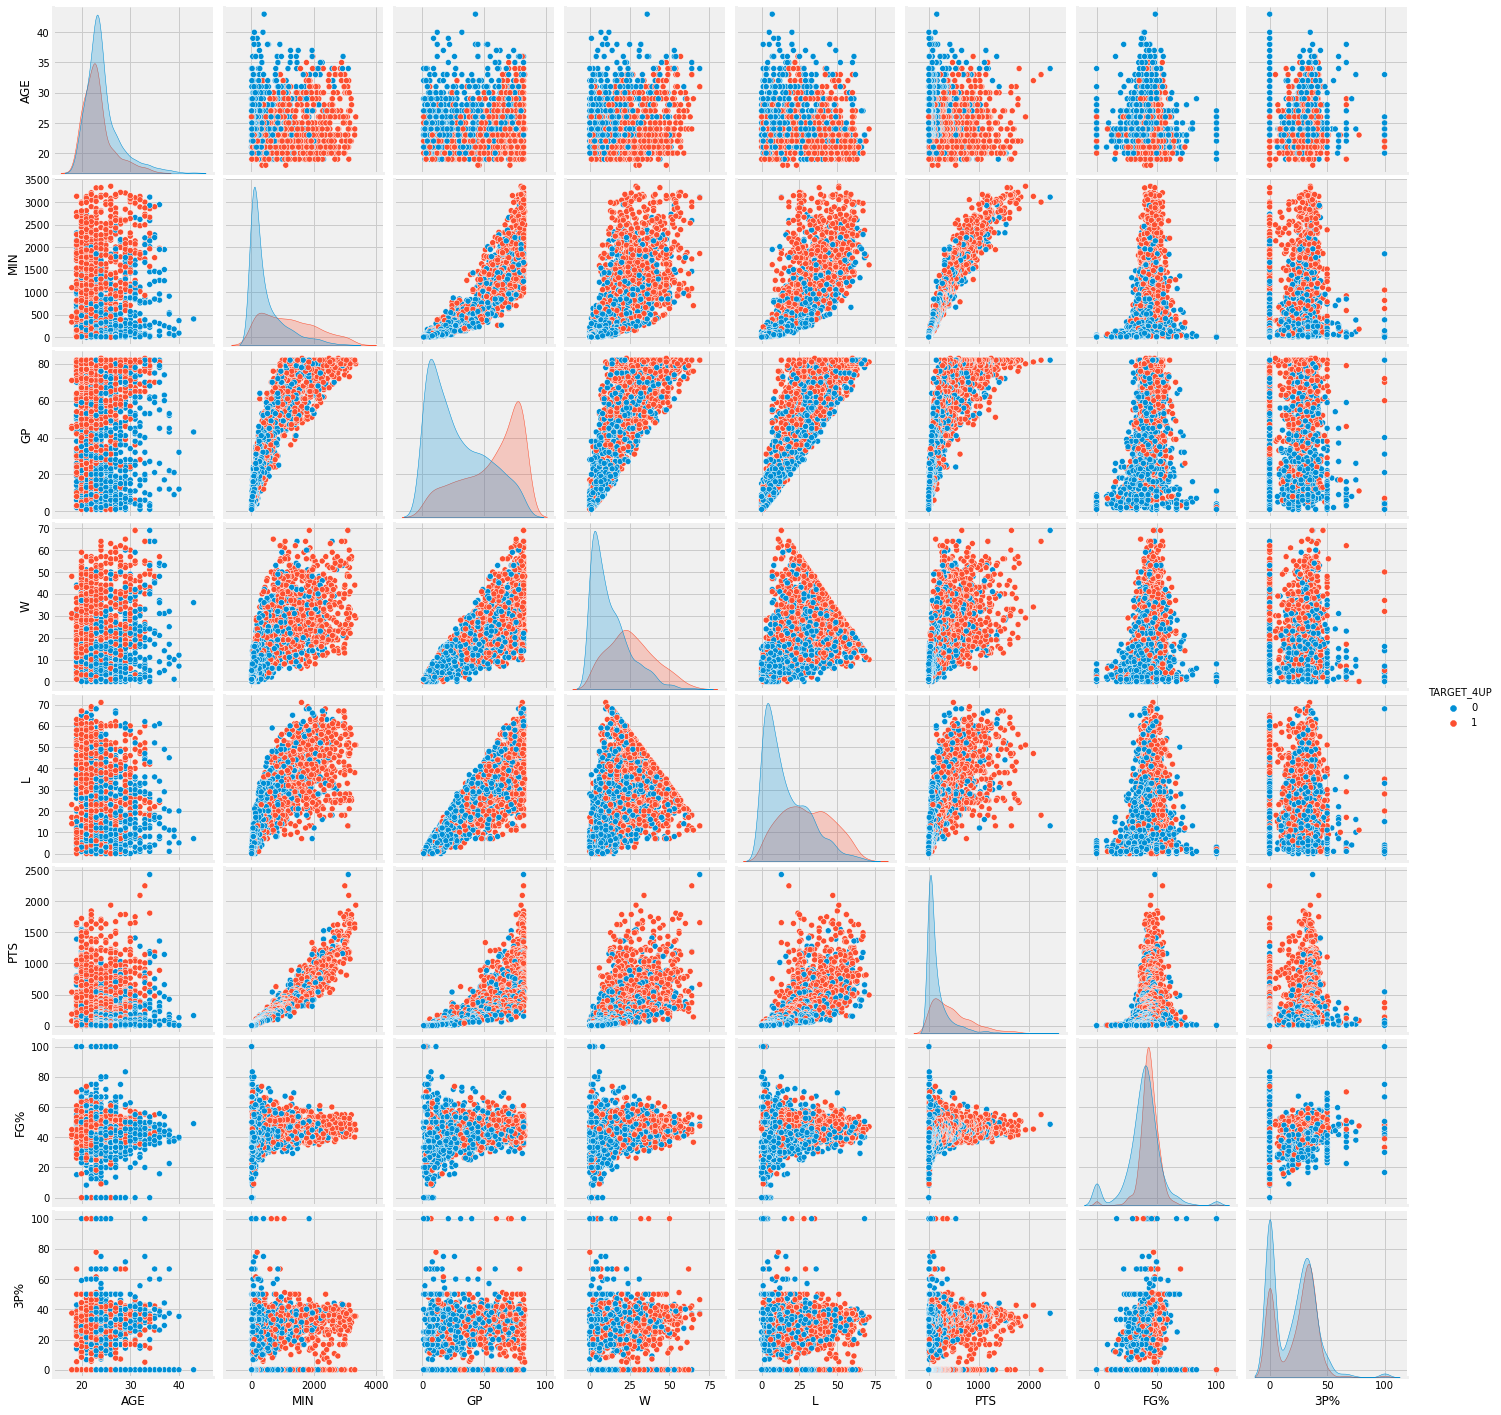

In [260]:
sns.pairplot(rookie_yrs.loc[:, ['AGE', 'MIN', 'GP', 'W', 'L', 'PTS', 'FG%', '3P%', 'TARGET_4UP']], hue='TARGET_4UP');

GP (Games Played) appears to have some separation and could be a good feature to use.

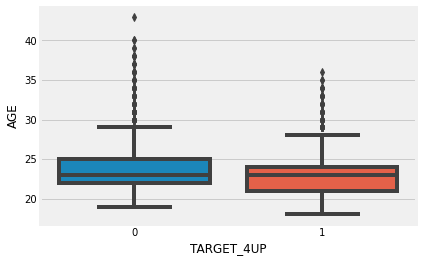

In [96]:
# Visualize some features using boxplot

# AGE
sns.boxplot(x='TARGET_4UP', y='AGE', data=rookie_yrs);

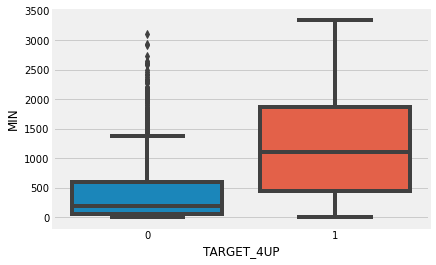

In [97]:
# MIN
sns.boxplot(x='TARGET_4UP', y='MIN', data=rookie_yrs);

Good separation!

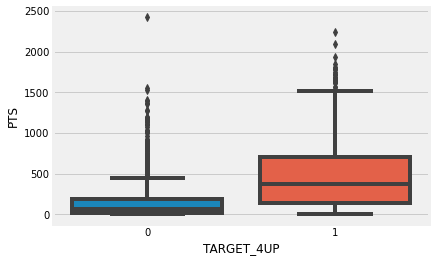

In [99]:
# PTS
sns.boxplot(x='TARGET_4UP', y='PTS', data=rookie_yrs);

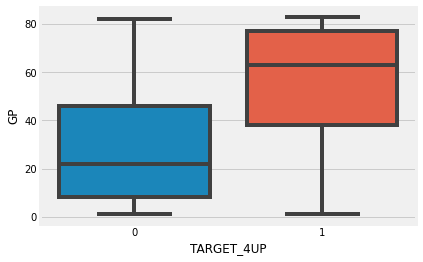

In [100]:
# GP
sns.boxplot(x='TARGET_4UP', y='GP', data=rookie_yrs);

Good separation!

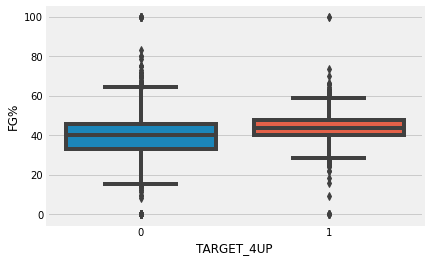

In [101]:
# FG%
sns.boxplot(x='TARGET_4UP', y='FG%', data=rookie_yrs);

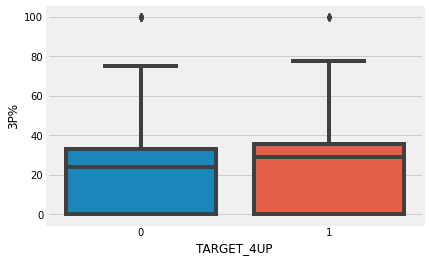

In [102]:
# 3P%
sns.boxplot(x='TARGET_4UP', y='3P%', data=rookie_yrs);

In [ ]:
# List potentially strong features based on EDA
strong_features_list=['NUM_YRS','MIN', 'PTS', 'GP']

# Partition Dataset

In [328]:
# Split into train, val, and test (60,20,20 divide)
X = rookie_yrs.drop(columns=['PLAYER', 'TEAM', 'SEASON','TARGET_4UP'])
y = rookie_yrs['TARGET_4UP']

# Hold out 20% of data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.20, random_state=42)

# Further partition X, y into validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Baseline with Logistic Regression

In [329]:
rookie_yrs.head(5)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FG%,3P%,...,TOV,STL,BLK,PF,DD2,TD3,+/-,SEASON,NUM_YRS,TARGET_4UP
0,Franz Wagner,ORL,20,79,21,58,2429.0,1197,46.8,35.4,...,119,68,34,164,2,0,-244,2021-22,1,0
1,Jalen Green,HOU,20,67,12,55,2137.7,1157,42.6,34.3,...,135,44,18,103,0,0,-519,2021-22,1,0
2,Scottie Barnes,TOR,20,74,43,31,2617.3,1134,49.2,30.1,...,136,80,55,192,13,0,66,2021-22,1,0
3,Cade Cunningham,DET,20,64,20,44,2088.1,1114,41.6,31.4,...,234,78,43,200,10,2,-275,2021-22,1,0
4,Evan Mobley,CLE,21,69,40,29,2331.0,1034,50.8,25.0,...,133,56,115,147,21,0,95,2021-22,1,0


### 1-Feature Input

In [402]:
# Choose a strong feature ('MIN') and build a baseline logistic regression model
logreg = LogisticRegression(C=1000) # setting C very high essentially removes regularization

# Fit model on train set
logreg.fit(X_train[['MIN']], y_train)

# Make predictions on val set
y_pred_lr = logreg.predict(X_val[['MIN']])
y_prob_pred_val = logreg.predict_proba(X_val[['MIN']])

# Score
print("Accuracy scores for logistic regression (1-F):")
print('train: {:6.2f}%'.format(100*logreg.score(X_train[['MIN']], y_train)))
print('test: {:6.2f}%'.format(100*logreg.score(X_val[['MIN']], y_val)))
print('\n')
print("Baseline logistic regression (1-F) validation scores: \n")
classify_logreg = classification_report(y_val, y_pred_lr)
print(classify_logreg)

Accuracy scores for logistic regression (1-F):
train:  72.12%
test:  72.56%


Baseline logistic regression (1-F) validation scores: 

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       275
           1       0.78      0.53      0.63       217

    accuracy                           0.73       492
   macro avg       0.74      0.70      0.71       492
weighted avg       0.74      0.73      0.71       492



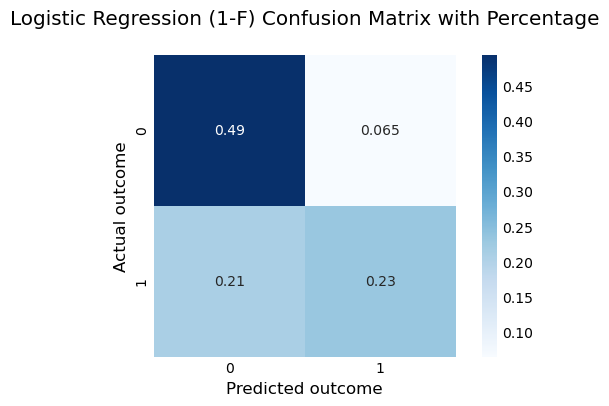

In [408]:
# Plot confusion matrix for logistic regression with percentage
logreg_confusion = confusion_matrix(y_val, y_pred_lr)
plt.figure(dpi=100)
ax = sns.heatmap(logreg_confusion/np.sum(logreg_confusion), cmap=plt.cm.Blues, annot=True, square=True)

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.xlabel('Predicted outcome')
plt.ylabel('Actual outcome')
plt.title('Logistic Regression (1-F) Confusion Matrix with Percentage\n');

In [332]:
# Coefficient
logreg.coef_

array([[0.00143083]])

The coefficient is positive. This tells us that a player is more likely to play beyond 4 years if they played more minutes during their rookie year.

In [333]:
logreg.intercept_

array([-1.50214181])

### Visualizations

In [410]:
# Visualize model's predictions and display decision boundry for 50% threshold

def viz_rookie(rookie_yrs, model, hard_classification=True, decision_boundary=False):
    
    # extract 'MIN' feature and hard or soft predictions
    feature = rookie_yrs[['MIN']].values
    if hard_classification:
        predictions = model.predict(feature)
    else:
        predictions = model.predict_proba(feature)[:, 1]
        
    # color filter true class labels and plot predictions
    rookie_mask = (rookie_yrs['TARGET_4UP']==1).values
    plt.plot(feature[rookie_mask], predictions[rookie_mask], 'bo', label='More than 4 Yrs', alpha=0.2)
    plt.plot(feature[~rookie_mask], predictions[~rookie_mask], 'ro', label='4 or Fewer Yrs', alpha=0.2)
    
    # optionally calculate and display decision boundary as dotted line
    if decision_boundary:
        b_0, b_1 = model.intercept_, model.coef_[0]
        plt.gca().axvline(-b_0/b_1, c='k', ls='--', lw=1)
        
    # plot formatting
    plt.ylim(-0.05, 1.05)
    plt.xlabel('Minutes Played')
    plt.ylabel('Prediction (1 = More than 4 Yrs)')
    type_str = 'hard' if hard_classification else 'soft'
    plt.title('Logistic regression ' + type_str + ' prediction for More or Fewer than 4 Yrs')
    plt.legend(loc='lower right')

viz_rookie(X_train, logreg, decision_boundary=True)

C:\Users\sandr\anaconda3\envs\metis\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


KeyError: 'TARGET_4UP'

The logistic regression has found a **decision boundary around ~1000 minutes played**: lower than that, the prediction is that the player does not play for more than 4 years based on their first year stats.  Higher than that, the model predicts that the player will play beyond 4 years based on their first year stats.

Note: this is a default decision boundary corresponding to 50% probability, and could be manually adjusted if we wanted to be more or less aggressive about predicting positives.

C:\Users\sandr\anaconda3\envs\metis\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


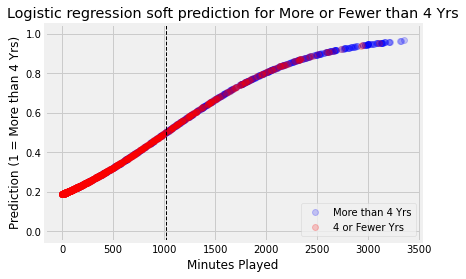

In [169]:
viz_rookie(X_train, logreg, hard_classification=False, decision_boundary=True)

Predicted probabilities become **increasingly confident the farther our feature gets from the decision boundary** (near 0 or 1) and less confident (around 50%) the closer it gets.

In [341]:
# Show confusion matrix
confusion_matrix(y_val, y_pred)

array([[243,  32],
       [103, 114]], dtype=int64)

### 3-Feature Inputs

In [401]:
# Instantiate the model
logreg2 = LogisticRegression(C=1000) # setting C very high essentially removes regularization

# Scale the features
X_train_scaled = std_scale.fit_transform(X_train[['MIN', 'GP', 'PTS']])
X_val_scaled = std_scale.transform(X_val[['MIN', 'GP', 'PTS']])

# Fit model on train set
logreg2.fit(X_train_scaled, y_train)

# Make predictions on val set
y_pred_lr2 = logreg2.predict(X_val_scaled)
y_prob_pred_val2 = logreg2.predict_proba(X_val_scaled)

# Score
print("Accuracy scores for logistic regression (3-F):")
print('train: {:6.2f}%'.format(100*logreg2.score(X_train_scaled, y_train)))
print('test: {:6.2f}%'.format(100*logreg2.score(X_val_scaled, y_val)))
print('\n')
print("Baseline logistic regression (3-F) validation scores: \n")
classify_logreg2 = classification_report(y_val, y_pred_lr2)
print(classify_logreg2)

Accuracy scores for logistic regression (3-F):
train:  74.69%
test:  73.58%


Baseline logistic regression (3-F) validation scores: 

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       275
           1       0.74      0.62      0.67       217

    accuracy                           0.74       492
   macro avg       0.74      0.72      0.73       492
weighted avg       0.74      0.74      0.73       492



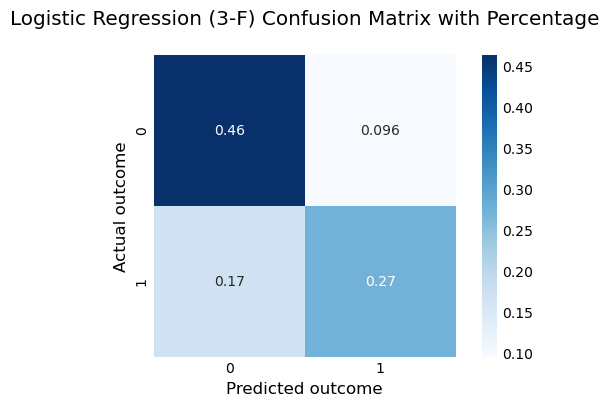

In [407]:
# Plot confusion matrix for logistic regression with percentage
logreg2_confusion = confusion_matrix(y_val, y_pred_lr2)
plt.figure(dpi=100)
ax = sns.heatmap(logreg2_confusion/np.sum(logreg2_confusion), cmap=plt.cm.Blues, annot=True, square=True)

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.xlabel('Predicted outcome')
plt.ylabel('Actual outcome')
plt.title('Logistic Regression (3-F) Confusion Matrix with Percentage\n');

In [ ]:
<<<<<<<<<<<<<<<<  !!!! >>>>>>>>>>>>>>>>>>>>>>

### All feature inputs

In [409]:
# Instantiate the model
logreg3 = LogisticRegression(C=1000) # setting C very high essentially removes regularization

# Scale the features
X_train_all_scaled = std_scale.fit_transform(X_train)
X_val_all_scaled = std_scale.transform(X_val)

# Fit model on train set
logreg3.fit(X_train_all_scaled, y_train)

# Make predictions on val set
y_pred_lr3 = logreg3.predict(X_val_all_scaled)
y_prob_pred_val3 = logreg3.predict_proba(X_val_all_scaled)

# Score
print("Accuracy scores for logistic regression (ALL-F):")
print('train: {:6.2f}%'.format(100*logreg3.score(X_train_all_scaled, y_train)))
print('test: {:6.2f}%'.format(100*logreg3.score(X_val_all_scaled, y_val)))
print('\n')
print("Baseline logistic regression (ALL-F) validation scores: \n")
classify_logreg3 = classification_report(y_val, y_pred_lr3)
print(classify_logreg3)

Accuracy scores for logistic regression (ALL-F):
train: 100.00%
test: 100.00%


Baseline logistic regression (ALL-F) validation scores: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00       217

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492



In [ ]:
<<<<<<<<<<<<<<<<<<<<< >>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Baseline with kNN

In [352]:
from sklearn.neighbors import KNeighborsClassifier

In [403]:
# Instantiate the model and fit
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_val)

print("Baseline accuracy scores for kNN:")
print('train: {:6.2f}%'.format(100*knn.score(X_train, y_train)))
print('test: {:6.2f}%'.format(100*knn.score(X_val, y_val)))
print('\n')
print("Baseline kNN scores: \n")
print(classification_report(knn.predict(X_val),y_val))

Baseline accuracy scores for kNN:
train:  75.44%
test:  72.97%


Baseline kNN scores: 

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       328
           1       0.57      0.76      0.65       164

    accuracy                           0.73       492
   macro avg       0.71      0.74      0.72       492
weighted avg       0.76      0.73      0.74       492



In [357]:
# Show confusion matrix
confusion_matrix(y_val, y_pred_knn)

array([[235,  40],
       [ 93, 124]], dtype=int64)

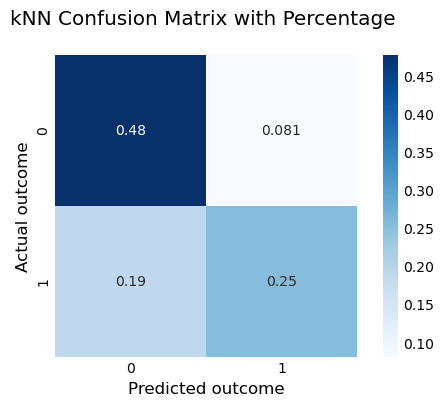

In [412]:
# Plot confusion matrix for kNN with percentage
knn_confusion = confusion_matrix(y_val, y_pred_knn)
plt.figure(dpi=100)
ax = sns.heatmap(knn_confusion/np.sum(knn_confusion), cmap=plt.cm.Blues, annot=True, square=True)

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.xlabel('Predicted outcome')
plt.ylabel('Actual outcome')
plt.title('kNN Confusion Matrix with Percentage \n');

### Summary of Baseline Scores

In [406]:
# Logistic Regression
print("Baseline test scores for logistic regression (1-F):")
print("Accuracy: {:6.2f}%".format(100*logreg.score(X_val[['MIN']], y_val)))
print("Precision: {:6.2f}%".format(100*precision_score(y_val, y_pred_lr)))
print("Recall: {:6.2f}%".format(100*recall_score(y_val, y_pred_lr)))
print("F1: {:6.2f}%".format(100*f1_score(y_val, y_pred_lr)))

print('\n')

# Logistic Regression
print("Baseline test scores for logistic regression (3-F):")
print("Accuracy: {:6.2f}%".format(100*logreg2.score(X_val_scaled, y_val)))
print("Precision: {:6.2f}%".format(100*precision_score(y_val, y_pred_lr2)))
print("Recall: {:6.2f}%".format(100*recall_score(y_val, y_pred_lr2)))
print("F1: {:6.2f}%".format(100*f1_score(y_val, y_pred_lr2)))

print('\n')

# kNN
print("Baseline test scores for kNN :")
print("Accuracy: {:6.2f}%".format(100*knn.score(X_val, y_val)))
print("Precision: {:6.2f}%".format(100*precision_score(y_val, y_pred_knn)))
print("Recall: {:6.2f}%".format(100*recall_score(y_val, y_pred_knn)))
print("F1: {:6.2f}%".format(100*f1_score(y_val, y_pred_knn)))

Baseline test scores for logistic regression (1-F):
Accuracy:  72.56%
Precision:  78.08%
Recall:  52.53%
F1:  62.81%


Baseline test scores for logistic regression (3-F):
Accuracy:  73.58%
Precision:  74.03%
Recall:  61.75%
F1:  67.34%


Baseline test scores for kNN :
Accuracy:  72.97%
Precision:  75.61%
Recall:  57.14%
F1:  65.09%


### Confusion Matrix